# SciPy - Interpolate

## What is Interpolation?

Interpolation is the process of finding a value between two points on a line or a curve. 

## Interpolation

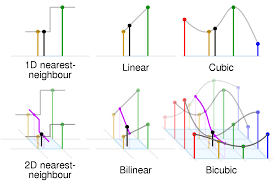

The word 'inter' means 'enter' which look inside the data we had. 

This tool interpolation is very useful in statistics and in data science, business, and data prediction that fall within two existing data points.

Let us create some data and see how this interpolation can be done using the scipy.interpolate package.

x:
[0.         0.44444444 0.88888889 1.33333333 1.77777778 2.22222222
 2.66666667 3.11111111 3.55555556 4.        ]

y:
[-0.65364362 -0.60243262 -0.43407793 -0.11951006  0.33453237  0.80382736
  0.99620179  0.58723956 -0.35228372 -0.99582185]



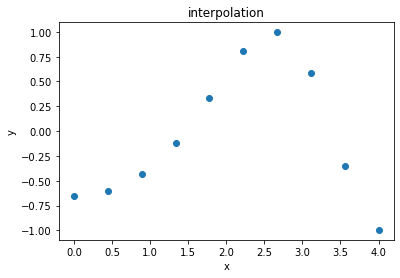

In [9]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 10)
y = np.cos(x**2/3+4)

print('x:')
print(x)
print()
print('y:')
print(y)
print()

plt.title('interpolation')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, y,'o')
plt.show()

## 1-D Interpolation

The interp1d class in the scipy.interpolate is a convenient method to create a function based on fixed data points, which can be evaluated anywhere within the domain defined by the given data using linear interpolation.

By using the above data, let us create a interpolate function and draw a new interpolated graph.

### 1D Quadratic Interpolation

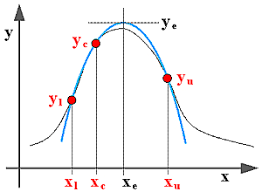

### Note: 

Using the interp1d function, we created two functions f1 and f2. 

These functions, for a given input x returns y. 

The third variable kind represents the type of the interpolation technique. 

'Linear', 'Nearest', 'Zero', 'Slinear', 'Quadratic', 'Cubic' are a few techniques of interpolation.

### Image Interpolation

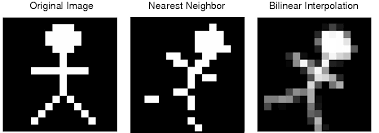

Now, let us create a new input of more length to see the clear difference of interpolation. 

We will use the same function of the old data on the new data.

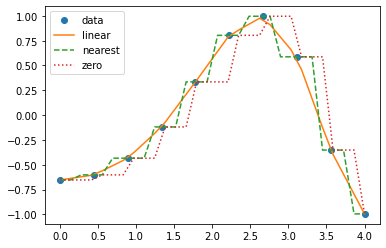

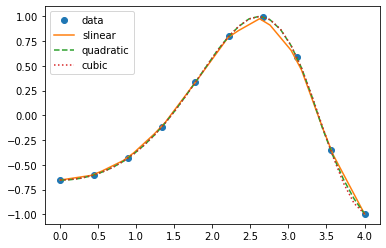

In [23]:
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 10)
y = np.cos(x**2/3+4)

f1 = interp1d(x, y, kind = 'linear')
f2 = interp1d(x, y, kind = 'nearest')
f3 = interp1d(x, y, kind = 'zero')
f4 = interp1d(x, y, kind = 'slinear')
f5 = interp1d(x, y, kind = 'quadratic')
f6 = interp1d(x, y, kind = 'cubic')

xnew = np.linspace(0, 4, 30)

plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'linear', 'nearest', 'zero'], loc = 'best')
plt.show()

plt.plot(x, y, 'o', xnew, f4(xnew), '-', xnew, f5(xnew), '--', xnew, f6(xnew), ':')
plt.legend(['data', 'slinear', 'quadratic', 'cubic'], loc = 'best')
plt.show()

# Splines (Strips)

To draw smooth curves through data points, drafters once used thin flexible strips of wood, hard rubber, metal or plastic called mechanical splines. 

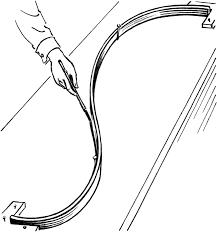

To use a mechanical spline, pins were placed at a judicious selection of points along a curve in a design, and then the spline was bent, so that it touched each of these pins.

Clearly, with this construction, the spline interpolates the curve at these pins. 

It can be used to reproduce the curve in other drawings. 

The points where the pins are located is called knots. 

We can change the shape of the curve defined by the spline by adjusting the location of the knots.

## Univariate Spline

One-dimensional smoothing spline fits a given set of data points. 

The UnivariateSpline class in scipy.interpolate is a convenient method to create a function, based on fixed data points class – 

    scipy.interpolate.UnivariateSpline(x, y, w = None, bbox = [None, None], k = 3, s = None, ext = 0, check_finite = False).


Parameters − Following are the parameters of a Univariate Spline.

- This fits a spline y = spl(x) of degree k to the provided x, y data.

- 'w' − Specifies the weights for spline fitting. Must be positive. If none (default), weights are all equal.

- 's' − Specifies the number of knots by specifying a smoothing condition.

- 'k' − Degree of the smoothing spline. Must be <= 5. Default is k = 3, a cubic spline.

- Ext − Controls the extrapolation mode for elements not in the interval defined by the knot sequence.

    - if ext = 0 or ‘extrapolate’, returns the extrapolated value.

    - if ext = 1 or ‘zero’, returns 0

    - if ext = 2 or ‘raise’, raises a ValueError

    - if ext = 3 of ‘const’, returns the boundary value.

- check_finite – Whether to check that the input arrays contain only finite numbers.

Let us consider the following example.

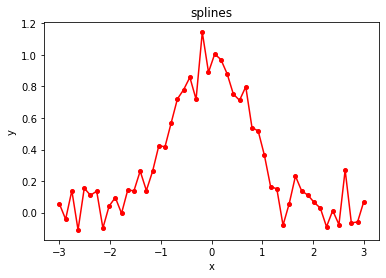

In [31]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)

plt.title('splines')
plt.xlabel('x')
plt.ylabel('y')
# ms: markersize
plt.plot(x, y, 'r-o', ms = 4)
plt.show()

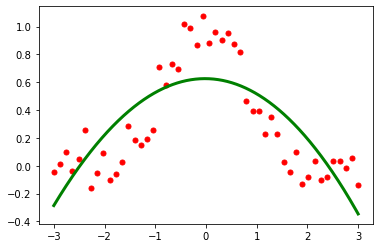

In [33]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms = 5)

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw = 3)
plt.show()

## Set Smooth Factor

    set_smoothing_factor

Manually change the amount of smoothing

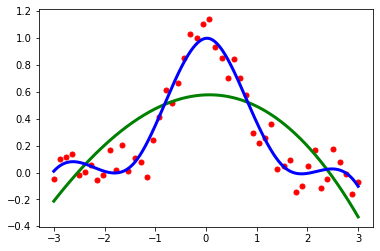

In [35]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms = 5)

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw = 3)

spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw = 3)
plt.show()